# Tweet Analysis and Visualization
In this question, you will load tweet data into pandas dataframes and analyse (and visualize!) some interesting trends using the [matplotlib](http://matplotlib.org) package.

## Q1. Load Twitter data using pandas
You are given three data files users.csv, edges.csv, tweets.csv. Fill in the following function that reads these three files return the data frames for users, edges and tweets.

Pandas will treat missing values as NaNs by default. However, for this assignment, you should treat missing values (i.e., empty strings in the csv files) as empty strings.

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,7)

In [46]:
def load_twitter_data_pandas(users_file, edges_file, tweets_file):
    """ Loads the Twitter data from the csv files into Pandas dataframes
    Input:
        users_file (str) 
        edges_file (str) 
        tweets_file (str) 
    Output:
        (pd.DataFrame, pd.DataFrame, pd.DataFrame) : A tuple of three dataframes, the first one for users,
                                                    the second for edges and the third for tweets.
    """
    
    users = pd.read_csv(users_file).fillna('')
    edges = pd.read_csv(edges_file).fillna('')
    tweets = pd.read_csv(tweets_file).fillna('')
    
    
    return (users, edges, tweets)
    


### Test load_twitter_data_pandas

In [47]:
(users_df, edges_df, tweets_df) = load_twitter_data_pandas('users.csv', 'edges.csv', 'tweets.csv')

In [48]:
users_df.head()

,name,screen_name,location,created_at,friends_count,followers_count,statuses_count,favourites_count
0,Donald J. Trump,realDonaldTrump,"New York, NY",Wed Mar 18 13:46:38 +0000 2009,42,11397769,33136,38
1,Trump Organization,Trump,"New York, NY",Wed Apr 13 16:51:54 +0000 2016,35,9954,43,125
2,Trump Golf,TrumpGolf,,Mon Feb 03 13:46:03 +0000 2014,200,8797,758,251
3,Tiffany Trump,TiffanyATrump,,Tue Feb 01 20:59:30 +0000 2011,79,63138,573,28
4,Laura Ingraham,IngrahamAngle,DC,Thu Jun 25 21:03:25 +0000 2009,289,851876,26523,71


In [49]:
edges_df.head()

,screen_name,friend
0,realDonaldTrump,Trump
1,realDonaldTrump,TrumpGolf
2,realDonaldTrump,TiffanyATrump
3,realDonaldTrump,IngrahamAngle
4,realDonaldTrump,mike_pence


In [50]:
tweets_df.head()

,screen_name,created_at,retweet_count,favorite_count,text
0,realDonaldTrump,Fri Sep 09 02:00:32 +0000 2016,2859,7030,Final poll results from NBC on last nights Com...
1,realDonaldTrump,Fri Sep 09 00:39:36 +0000 2016,6463,17951,It wasn't Matt Lauer that hurt Hillary last ni...
2,realDonaldTrump,Thu Sep 08 23:56:22 +0000 2016,5405,13223,More poll results from last nights Commander-i...
3,realDonaldTrump,Thu Sep 08 19:52:32 +0000 2016,11633,27028,Last nights results - in poll taken by NBC. #A...
4,realDonaldTrump,Thu Sep 08 18:17:01 +0000 2016,3824,12567,"With Luis, Mexico and the United States would ..."


## Q2.  Trending tweets on a topic
Twitter is regarded as an invaluable source of valuable information. Hence, one of the favorite tasks of data miners is the analyse the trending tweets in a given topic.

This task requires you to retrieve the top N most trending tweets (in descending order of trending_score) about a given topic (which is a list of keywords). The following information may be useful:

A tweet is said to be about a given topic if it contains any of the given topical phrases/keywords.
We will use the following simple trending_score: retweet_count + favorite_count. Tweets with higher trending_score must be ranked before the ones with lower trending_score.
Your result must contain unique tweets. If a tweet text occurs multiple times, display it only once with its highest trending_score.
Break ties by sorting the tweets in alphabetical order.
The output schema should be as follows:

tweet (TEXT)	trending_score (INTEGER)


In [125]:
def trending_tweets(tweets_df, topical_phrase='Hillary Clinton', N=5):
    """ Retrieves the top N trending tweets containing one or more of the given topical phrases.
    Input:
        tweets_df: the tweets dataframe.
        topical_phrase (a string): A keywords identifying a topic.
        N: Number of trending tweets to retrieve
    Output:
        
    """
    pd.set_option('mode.chained_assignment', None)
    tweets = tweets_df.drop_duplicates(subset='text')
    tweets = tweets[tweets['text'].str.contains(topical_phrase, case=False)]
    tweets['trending_score'] = tweets['retweet_count'] + tweets['favorite_count']
    tweets = tweets.sort_values('text', ascending=True)
    sorted_tweets = tweets.sort_values(by = ['trending_score'], ascending=False)
    return sorted_tweets.head(n=N)
    

    

## Test trending_tweets function

In [126]:
trending_tweets(tweets_df,'Hillary Clinton',5)

,screen_name,created_at,retweet_count,favorite_count,text,trending_score
9,realDonaldTrump,Thu Sep 08 12:10:13 +0000 2016,8120,26298,"""A rough night for Hillary Clinton"" ABC News.",34418
6,realDonaldTrump,Thu Sep 08 16:25:36 +0000 2016,8599,24244,Hillary Clinton answered email questions diffe...,32843
18,realDonaldTrump,Wed Sep 07 15:11:59 +0000 2016,8123,21415,'Donald Trump leads Hillary Clinton by 19 poin...,29538
4829,PaulManafort,Thu Aug 11 16:46:13 +0000 2016,1166,1895,Donald Trump narrowly leads Hillary Clinton in...,3061
4839,PaulManafort,Mon Aug 08 14:09:40 +0000 2016,1395,1614,Why Hillary Clinton's email controversy is sti...,3009


In [127]:
trending_tweets(tweets_df,'Donald Trump',5)

,screen_name,created_at,retweet_count,favorite_count,text,trending_score
18,realDonaldTrump,Wed Sep 07 15:11:59 +0000 2016,8123,21415,'Donald Trump leads Hillary Clinton by 19 poin...,29538
335,KatrinaPierson,Sat Sep 17 16:50:15 +0000 2016,5418,0,"RT @realDonaldTrump: ""Donald Trump’s birther e...",5418
723,morningmika,Thu Sep 08 14:38:45 +0000 2016,5234,0,RT @HillaryClinton: The next time Donald Trump...,5234
4834,PaulManafort,Wed Aug 10 23:23:10 +0000 2016,1515,2257,Donald Trump pushes fiscally sound economic pl...,3772
4829,PaulManafort,Thu Aug 11 16:46:13 +0000 2016,1166,1895,Donald Trump narrowly leads Hillary Clinton in...,3061


## Q3: Tweet recommendation
How does Twitter go about populating the feed for a user? While Twitter may use a complex models to do this, in this task, we will use a Simple Tweet Recommender (STR), which recommends a user's tweets to all users who follow him/her (without checking for possible duplicates; i.e., STR may recommend the same tweet twice if two of a user's friends have posted it).

In this task, you will determine the number of tweets recommended to each user. Use only the snapshot of edges and tweets we have provided to you to do the recommendation. Report the results on the users present in the users table. (Hint: The number of records in your output should match that in the "users" table.) The order of results does not matter.

The output frame should be:

screen_name (TEXT) num_tweets (INTEGER)

In [169]:
def num_tweets_in_feed(users_df,edges_df,tweets_df):
    """ Retrieves the number of tweets STR recommends to each Twitter user.
    Input:
        all the pandas dataframes for this problem
    Output:
        results: a dataframe associating screen name with number of tweets in feed
    """
    tweets = tweets_df.sort_values('screen_name', ascending=True)
    users = users_df
    edges = edges_df
    counts = tweets.groupby(['screen_name'])['text'].count().to_frame()
    counts = counts.rename(index=str, columns = {'text':'recommended tweets'})
    merged = pd.merge(edges, counts, left_on = ['friend'], right_on = ['screen_name'], how = 'left')
    total = merged.groupby(['screen_name'])[['recommended tweets']].sum()
    result = pd.merge(users, total, left_on = ['screen_name'], right_on = ['screen_name'], how = 'left')
    
    return result
    
    
    




## Test num_tweets_in_feed function

In [171]:
results = num_tweets_in_feed(users_df,edges_df,tweets_df)
results[results.screen_name=='EricTrump']

,name,screen_name,location,created_at,friends_count,followers_count,statuses_count,favourites_count,recommended tweets
35,Eric Trump,EricTrump,,Mon May 11 21:42:30 +0000 2009,442,448205,4103,3290,340.0


## Q4. Computing Correlations 
Statisticians and data analysts usually like to study about correlation between different observed variables. This helps uncover interesting patterns in the data such as causal relationships (e.g., snow on the road leads to increase in number of accidents). Correlation studies are important for multiple reasons:
- While [correlation does not imply causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation), a lack of correlation implies a lack of causation. This can be used to rule out many causal relationships.
- Correlation helps with prediction. The more closely related two variables are, the easier it is to predict one from the other.

In this task, we ask you to plot the friends_count (on y-axis) vs the followers_count (on x-axis) using the matplotlib package. [Here](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) is an example to get started with scatter plots.

In [175]:
def plot_friends_vs_followers(users_df):
    """ Plots the friends_count (on y-axis) against the followers_count (on x-axis).
    Input:
        users_df (pd.DataFrame) : Dataframe containing Twitter user attributes,
                                    as returned by load_twitter_data_pandas()
    Output:
     The  scatter plot 
    """
    

    return users_df.plot(kind='scatter',y='friends_count', x='followers_count')


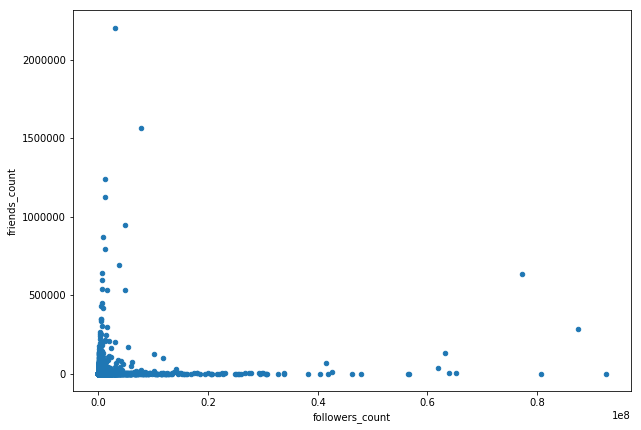

In [176]:
p = plot_friends_vs_followers(users_df)
plt.show()

Do you see a correlation between these two variables from your scatter plot? Let's measure this quantitatively using the [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient). 

For a set of observations $(X,Y) = [(x_1,y_1), (x_2,y_2), ... , (x_n,y_n)]$, the Pearson's correlation coefficient is a measure of the linear dependence between two variables $X$ and $Y$, giving a value between +1 and −1 inclusive, where 1 is total positive correlation, 0 is no correlation, and −1 is total negative correlation.

$r=r_{xy}={\frac {n\sum x_{i}y_{i}-\sum x_{i}\sum y_{i}}{{\sqrt {n\sum x_{i}^{2}-(\sum x_{i})^{2}}}~{\sqrt {n\sum y_{i}^{2}-(\sum y_{i})^{2}}}}}$

Now, fill in the following function to compute the Pearson's correlation coefficient between friends_count and followers_count.

In [186]:
def correlation_coefficient(users_df):
    """ Computes correlation coefficient between friends_count and followers_count in users_df.
    Input:
        users_df (pd.DataFrame) : Dataframe containing Twitter user attributes,
                                    as returned by load_twitter_data_pandas()
    Output:
        (double) : correlation coefficient between friends_count and followers_count
    """
   
    return users_df.corr(method='pearson')['friends_count']['followers_count']



In [187]:
print (correlation_coefficient(users_df))

0.09308640516482404


## Q5.  Degree distribution 

As you're familiar with graphs, you might know that the degree of a node is the number of connections it has to other nodes. A common statistic to look out for in the case of real world graphs is the degree distribution. Literature says degrees of nodes in real world graphs follow a [power law distribution](https://en.wikipedia.org/wiki/Power_law). The implication is that a scatter plot of num_users versus k (as we will define below) yields an almost straight line. In this task, we shall verify whether the given crawl of Twitter network satisfies this property.

Let us call the number of friends a Twitter user has as his/her degree. The degree distribution is a histogram of the number of friends. Your task is to visualize this histogram. Use the default number of bins.

In [211]:
def degree_distribution(edges_df):
    """ Plots the distribution of .
    Input:
        edges_df (pd.DataFrame) : Dataframe containing Twitter edges,
                        as returned by load_twitter_data_pandas()
    Output:
        histogram of number of friends
    """
    total = edges_df.groupby(['screen_name']).count()

    return total['friend'].plot.hist()
    


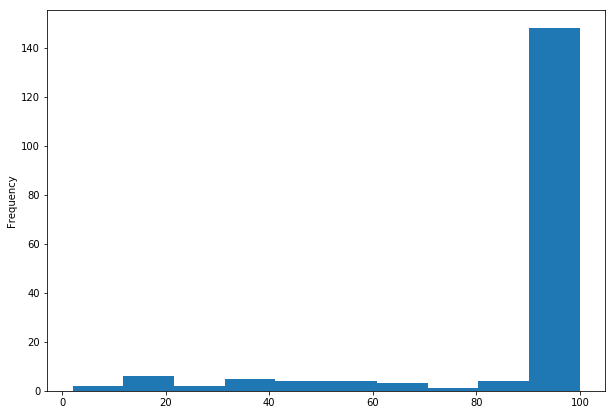

In [212]:
degree_distribution(edges_df)

## Question

- Do you notice any surprising/unexpected pattern in degree-distribution plot? What does this plot reveal about limitations of collecting certain types of data on Twitter?

Many people have exactly 100 people that they are following. This might be a limitation of the dataset, or be telling about the nature of the users who are represented in the dataset (i.e. bots).

Some of the limitations of collecting Twitter data stems from the wide variety of users (celebrities and political figures as opposed to everyday Joes). Also, the follower restrictions on some accounts could affect data collection.

## Other Analysis

- who has the most friends in this data set?
- who has the most followers?
- who are the people with over 10,000 friends?
- who are the people with over 10,000 followers?
- who are the people with over10,000 friends and 10,000 followers?
- make up an interesting question that can be asked in the context of this data set, and answer it using the data.